In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('TSLA.csv')
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [34]:
#iqr for different cols in dataset
iqr={}
iqr['Open']=266.450012-34.342498
iqr['High']=270.927513-34.897501
iqr['Low']=262.102501-33.587501
iqr['Close']=266.774994-34.400002
iqr['Volume']=(7.361150-1.899275)*(10**6)

In [35]:
'''
    Dropping Adj Close as it is identical to Close
'''
df.drop(['Date','Adj Close'],axis=1, inplace=True)

Exploratory data analysis on various columns of dataset

In [36]:
#Checking correlation of each column to target column
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,1.000000


In [37]:
#Creating a function to create boxplot of a features against target value
def show_distribution(x):
    mean_value=x.mean()
    median_value=x.median()
    mode_value=x.mode()[0]
    min_value=x.min()
    max_value=x.max()
    
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_value,
                                                                                        mean_value,
                                                                                        median_value,
                                                                                        mode_value,
                                                                                        max_value))
    fig,ax=plt.subplots(2,1,figsize=(10,5))
    
    #Creating histogram for finding distribution of data
    ax[0].hist(x)
    ax[0].set_ylabel('Frequency')
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)
    
    #Creating boxplot for finding outliers
    ax[1].boxplot(x, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the Figure
    fig.suptitle('Data Distribution')
    
    #Showing figure
    fig.show()

Minimum:15.80
Mean:186.40
Median:212.96
Mode:27.42
Maximum:780.00



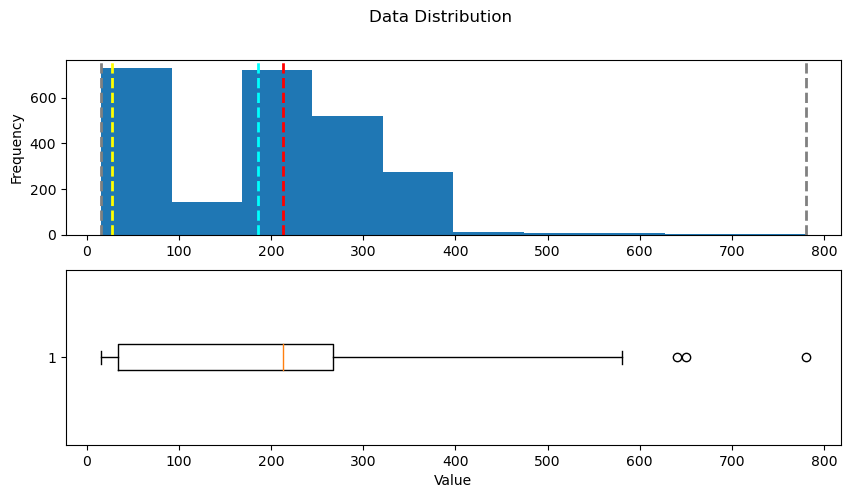

In [38]:
#Checking distribution of target to find outliers
show_distribution(df.Close)

In [39]:
#Removing outliers from target feature
'''
    Values considered in outliers are less than 1.5 x iqr + Q1 and values greater than 1.5 x iqr + Q3
'''
print('Shape of dataset before removing outliers: ',df.shape)
df=df[df.Close<(df['Close'].quantile(0.75)+(1.5*iqr['Close']))]
df=df[df.Close>(df['Close'].quantile(0.25)-(1.5*iqr['Close']))]
print('Shape of dataset after removing outliers: ',df.shape)

Shape of dataset before removing outliers:  (2416, 5)
Shape of dataset after removing outliers:  (2413, 5)


Minimum:15.80
Mean:185.78
Median:212.94
Mode:27.42
Maximum:580.99



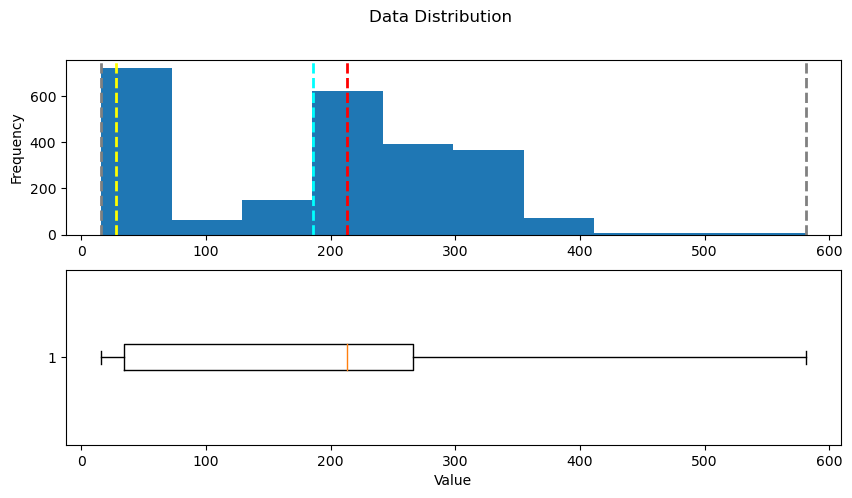

In [40]:
#Checking distribution of target after removing outliers
show_distribution(df.Close)

Minimum:16.14
Mean:185.70
Median:212.95
Mode:28.00
Maximum:575.69



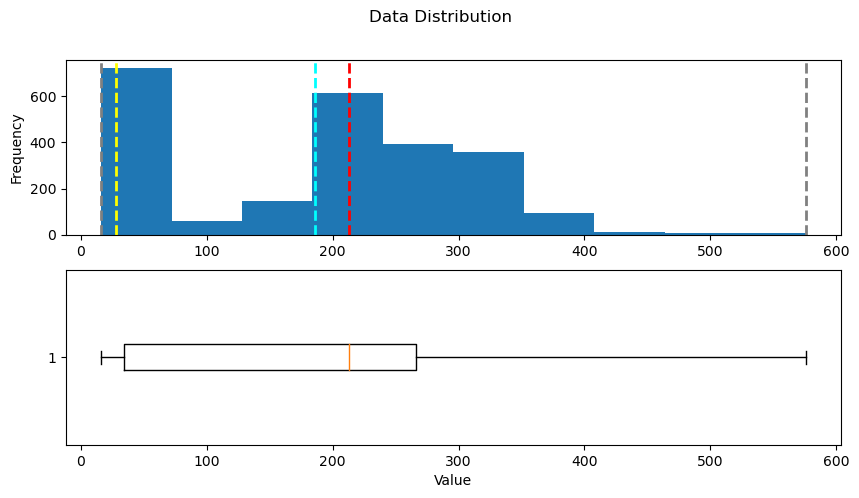

In [41]:
#Checking distribution of features
show_distribution(df.Open)

Minimum:118500.00
Mean:5541610.28
Median:4573000.00
Mode:661500.00
Maximum:37163900.00



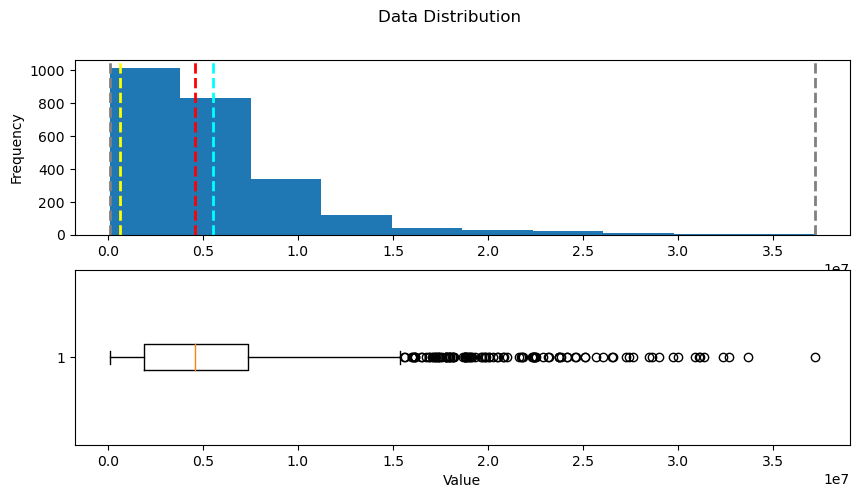

In [42]:
show_distribution(df.Volume)

Minimum:16.63
Mean:188.95
Median:216.72
Mode:28.00
Maximum:594.50



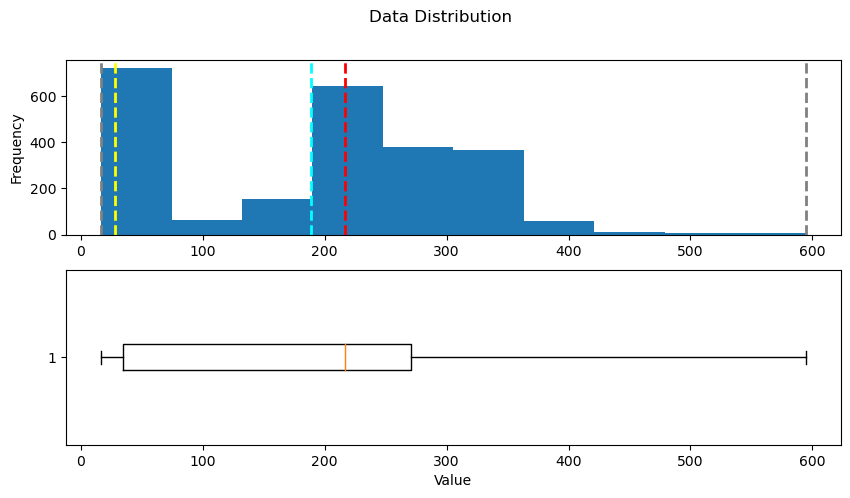

In [43]:
show_distribution(df.High)

Minimum:14.98
Mean:182.35
Median:208.80
Mode:27.30
Maximum:567.43



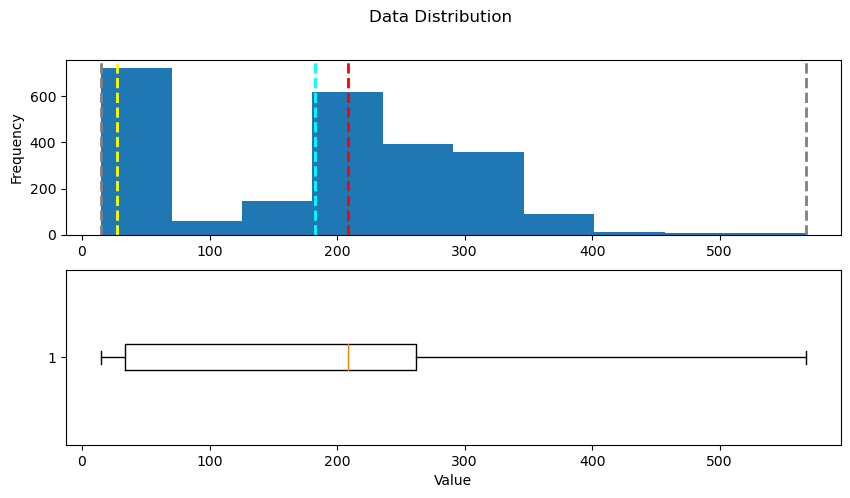

In [44]:
show_distribution(df.Low)

In [45]:
#Function to plot density of data of a feature/target
def plot_density(x):
    fig=plt.figure(figsize=(10,5))
    #Plotting density using dataframes function plot
    x.plot.density()
    #Adding title
    plt.title('Data Density')
    # Show the mean, median, and mode
    plt.axvline(x=x.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=x.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=x.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
    # Show the figure
    plt.show()

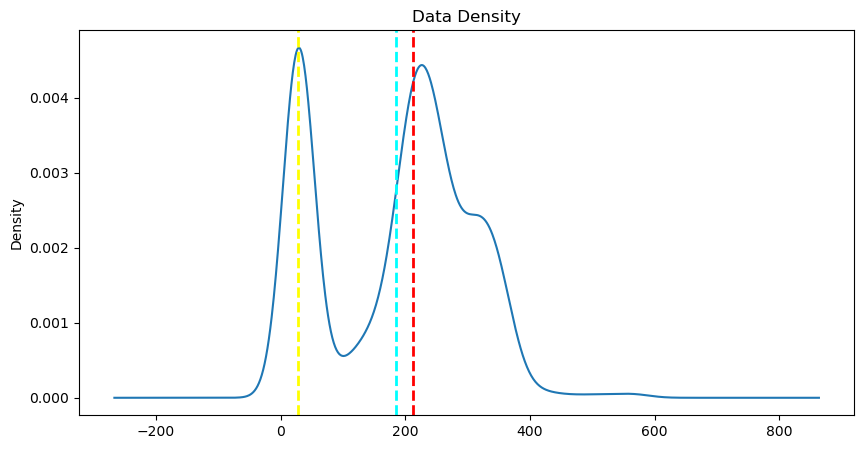

In [46]:
#Plotting density of target
plot_density(df.Close)

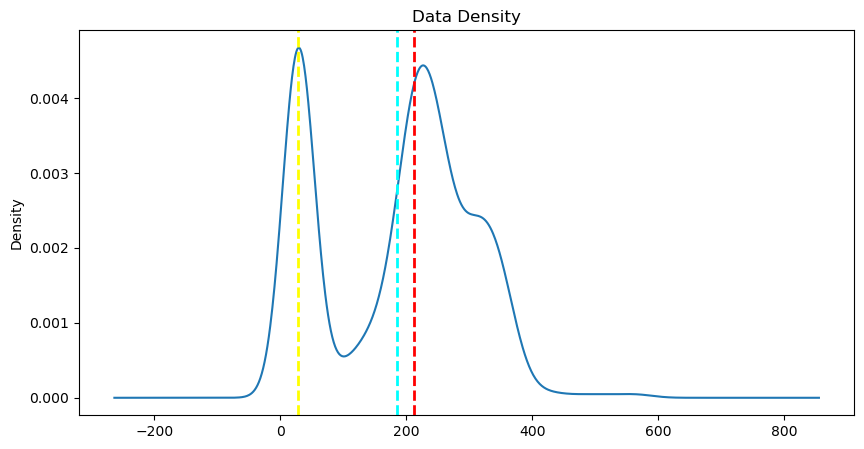

In [47]:
#Plotting density of feature: Open
plot_density(df.Open)

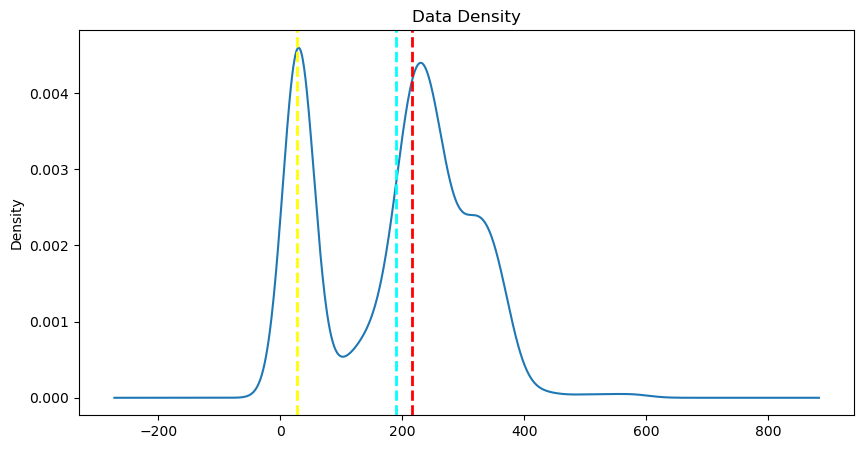

In [48]:
#Plotting density of feature: High
plot_density(df.High)

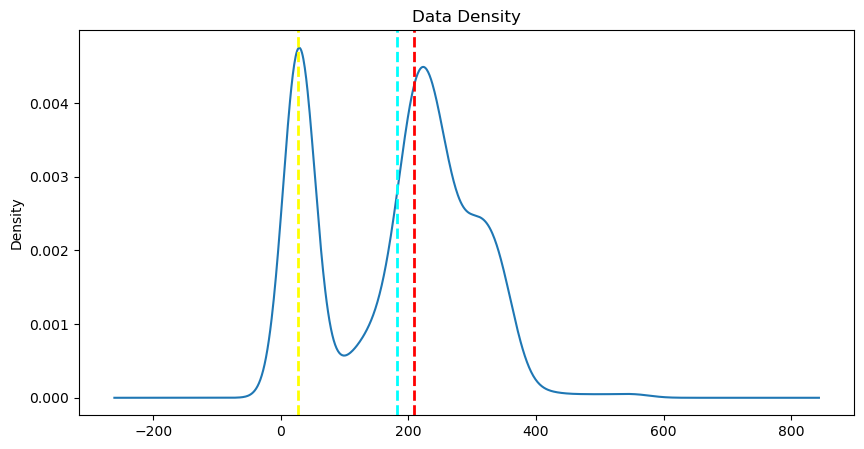

In [49]:
#Plotting density of feature: Low
plot_density(df.Low)

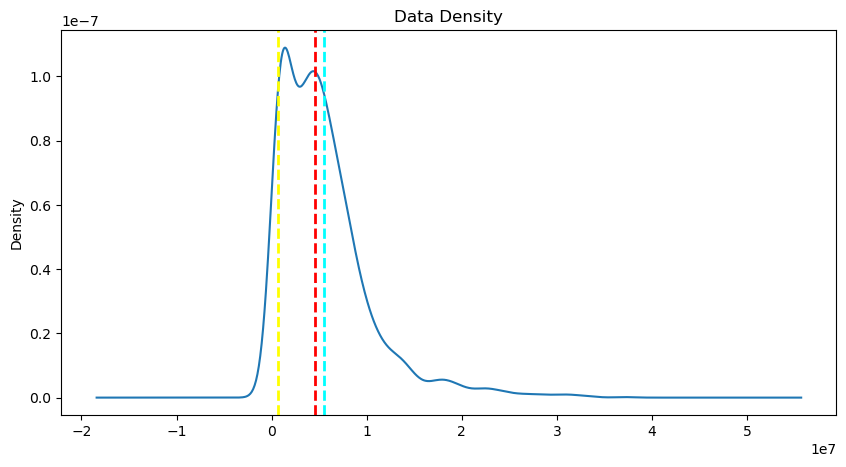

In [51]:
#Plotting density of feature: Volume
plot_density(df.Volume)

Since there is high correlation between each of feature and target variable, and we do not have categorical features
Linear regression would be best choice. Number of features are less and not much complexity in each of feature. Possible outliers are not present in target column.

In [52]:
df.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [55]:
#Splitting dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(df[['Open','High','Low','Volume']],df['Close'],test_size=0.30,random_state=1)
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 1689 rows
Test Set: 724 rows


In [57]:
#Using linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [59]:
#Testing model for prediction
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 4.052025406287179
RMSE: 2.012964333088686
R2: 0.9997008749949374


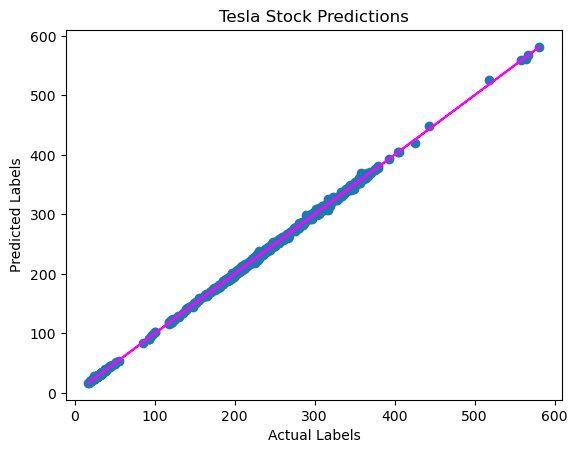

In [65]:
#Plotting a scatter plot of actual values and regression line of our model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Tesla Stock Predictions')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [60]:
#Saving the trained model
import joblib
# Save the model as a pickle file
filename = 'tesla_stock_prediction_linear_regression_model.pkl'
joblib.dump(model, filename)

['tesla_stock_prediction_linear_regression_model.pkl']